# Import Libraries


In [1]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, MaxPooling2D, Conv2D, Dense, Input, Flatten

# Download Dataset and Unzip

In [2]:
!kaggle datasets download -d galibabdullah/fresh-and-rotten-classification-dataset-4

Dataset URL: https://www.kaggle.com/datasets/galibabdullah/fresh-and-rotten-classification-dataset-4
License(s): unknown
100% 2.92G/2.92G [02:16<00:00, 23.9MB/s]
100% 2.92G/2.92G [02:16<00:00, 22.9MB/s]


In [3]:
!unzip fresh-and-rotten-classification-dataset-4.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset-edited/Train/rottenokra/o_r109.png  
  inflating: dataset-edited/Train/rottenokra/o_r110.png  
  inflating: dataset-edited/Train/rottenokra/o_r111.png  
  inflating: dataset-edited/Train/rottenokra/o_r112.png  
  inflating: dataset-edited/Train/rottenokra/o_r113.png  
  inflating: dataset-edited/Train/rottenokra/o_r114.png  
  inflating: dataset-edited/Train/rottenokra/o_r115.png  
  inflating: dataset-edited/Train/rottenokra/o_r116.png  
  inflating: dataset-edited/Train/rottenokra/o_r117.png  
  inflating: dataset-edited/Train/rottenokra/o_r118.png  
  inflating: dataset-edited/Train/rottenokra/o_r119.png  
  inflating: dataset-edited/Train/rottenokra/o_r120.png  
  inflating: dataset-edited/Train/rottenokra/o_r121.png  
  inflating: dataset-edited/Train/rottenokra/o_r122.png  
  inflating: dataset-edited/Train/rottenokra/o_r123.png  
  inflating: dataset-edited/Train/rottenokra/o_r124.png  
  inflating: dataset-

# Split Dataset

In [4]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [5]:
try:

    base_dir = './'
    fresee_dir = make_dir(os.path.join(base_dir, 'fresee-dataset'))
    train_dir = make_dir(os.path.join(fresee_dir, 'train'))
    val_dir = make_dir(os.path.join(fresee_dir, 'validation'))
    test_dir = make_dir(os.path.join(fresee_dir, 'test'))

    train_fdir = make_dir(os.path.join(train_dir, 'Fresh'))
    train_rdir = make_dir(os.path.join(train_dir, 'Rotten'))

    val_fdir = make_dir(os.path.join(val_dir, 'Fresh'))
    val_rdir = make_dir(os.path.join(val_dir, 'Rotten'))

    test_fdir = make_dir(os.path.join(test_dir, 'Fresh'))
    test_rdir = make_dir(os.path.join(test_dir, 'Rotten'))

except OSError:
    pass

In [6]:
def split_dataset(src='', training='', validate='', split_size=0, seed=42):
    random.seed(seed)
    dataset = sorted(os.listdir(src))
    random_dataset = random.sample(dataset, len(dataset))

    train_size = int(len(dataset) * split_size)

    for k, filename in enumerate(random_dataset):
        filepath = os.path.join(src, filename)
        if os.path.getsize(filepath) > 0:
            if k < train_size:
                copyfile(filepath, os.path.join(training, filename))
            else:
                copyfile(filepath, os.path.join(validate, filename))

In [7]:
dtrain_dir = './dataset-edited/Train'

fapple_train_dir = os.path.join(dtrain_dir, 'freshapples')
fbanana_train_dir = os.path.join(dtrain_dir,'freshbanana')
fcucumber_train_dir = os.path.join(dtrain_dir, 'freshcucumber')
fokra_train_dir = os.path.join(dtrain_dir,'freshokra')
forange_train_dir = os.path.join(dtrain_dir,'freshoranges')
fpotato_train_dir = os.path.join(dtrain_dir,'freshpotato')
ftomato_train_dir = os.path.join(dtrain_dir,'freshtomato')

rapple_train_dir = os.path.join(dtrain_dir,'rottenapples')
rbanana_train_dir = os.path.join(dtrain_dir,'rottenbanana')
rcucumber_train_dir = os.path.join(dtrain_dir,'rottencucumber')
rokra_train_dir = os.path.join(dtrain_dir, 'rottenokra')
rorange_train_dir = os.path.join(dtrain_dir,'rottenoranges')
rpotato_train_dir = os.path.join(dtrain_dir, 'rottenpotato')
rtomato_train_dir = os.path.join(dtrain_dir,'rottentomato')

print('fresh apple train     = ', len(os.listdir(fapple_train_dir)))
print('fresh banana train    = ', len(os.listdir(fbanana_train_dir)))
print('fresh cucumber train  = ', len(os.listdir(fcucumber_train_dir)))
print('fresh okra train      = ', len(os.listdir(fokra_train_dir)))
print('fresh orange train    = ', len(os.listdir(forange_train_dir)))
print('fresh potato train    = ', len(os.listdir(fpotato_train_dir)))
print('fresh tomato train    = ', len(os.listdir(ftomato_train_dir)), '\n')

print('rotten apple train    = ', len(os.listdir(rapple_train_dir)))
print('rotten banana train   = ', len(os.listdir(rbanana_train_dir)))
print('rotten cucumber train = ', len(os.listdir(rcucumber_train_dir)))
print('rotten okra train     = ', len(os.listdir(rokra_train_dir)))
print('rotten orange train   = ', len(os.listdir(rorange_train_dir)))
print('rotten potato train   = ', len(os.listdir(rpotato_train_dir)))
print('rotten tomato train   = ', len(os.listdir(rtomato_train_dir)))

fresh apple train     =  2424
fresh banana train    =  2468
fresh cucumber train  =  496
fresh okra train      =  635
fresh orange train    =  1466
fresh potato train    =  753
fresh tomato train    =  2282 

rotten apple train    =  3248
rotten banana train   =  2932
rotten cucumber train =  421
rotten okra train     =  338
rotten orange train   =  1595
rotten potato train   =  1062
rotten tomato train   =  2113


In [8]:
dtest_dir = './dataset-edited/Test'

fapple_test_dir = os.path.join(dtest_dir, 'freshapples')
fbanana_test_dir = os.path.join(dtest_dir,'freshbanana')
fcucumber_test_dir = os.path.join(dtest_dir, 'freshcucumber')
fokra_test_dir = os.path.join(dtest_dir,'freshokra')
forange_test_dir = os.path.join(dtest_dir,'freshoranges')
fpotato_test_dir = os.path.join(dtest_dir,'freshpotato')
ftomato_test_dir = os.path.join(dtest_dir,'freshtomato')

rapple_test_dir = os.path.join(dtest_dir,'rottenapples')
rbanana_test_dir = os.path.join(dtest_dir,'rottenbanana')
rcucumber_test_dir = os.path.join(dtest_dir,'rottencucumber')
rokra_test_dir = os.path.join(dtest_dir, 'rottenokra')
rorange_test_dir = os.path.join(dtest_dir,'rottenoranges')
rpotato_test_dir = os.path.join(dtest_dir, 'rottenpotato')
rtomato_test_dir = os.path.join(dtest_dir,'rottentomato')

print('fresh apple test     = ', len(os.listdir(fapple_test_dir)))
print('fresh banana test    = ', len(os.listdir(fbanana_test_dir)))
print('fresh cucumber test  = ', len(os.listdir(fcucumber_test_dir)))
print('fresh okra test      = ', len(os.listdir(fokra_test_dir)))
print('fresh orange test    = ', len(os.listdir(forange_test_dir)))
print('fresh potato test    = ', len(os.listdir(fpotato_test_dir)))
print('fresh tomato test    = ', len(os.listdir(ftomato_test_dir)), '\n')

print('rotten apple test    = ', len(os.listdir(rapple_test_dir)))
print('rotten banana test   = ', len(os.listdir(rbanana_test_dir)))
print('rotten cucumber test = ', len(os.listdir(rcucumber_test_dir)))
print('rotten okra test     = ', len(os.listdir(rokra_test_dir)))
print('rotten orange test   = ', len(os.listdir(rorange_test_dir)))
print('rotten potato test   = ', len(os.listdir(rpotato_test_dir)))
print('rotten tomato test   = ', len(os.listdir(rtomato_test_dir)))

fresh apple test     =  791
fresh banana test    =  892
fresh cucumber test  =  279
fresh okra test      =  370
fresh orange test    =  388
fresh potato test    =  487
fresh tomato test    =  679 

rotten apple test    =  988
rotten banana test   =  900
rotten cucumber test =  255
rotten okra test     =  224
rotten orange test   =  403
rotten potato test   =  630
rotten tomato test   =  641


In [9]:
seed_value = 42
split_size = 0.8

# Fresh
split_dataset(fapple_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fbanana_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fcucumber_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fokra_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(forange_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fpotato_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(ftomato_train_dir, train_fdir, val_fdir, split_size, seed=seed_value)

# Rotten
split_dataset(rapple_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rbanana_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rcucumber_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rokra_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rorange_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rpotato_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rtomato_train_dir, train_rdir, val_rdir, split_size, seed=seed_value)

split_size = 0.1

#Fresh
split_dataset(fapple_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fbanana_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fcucumber_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fokra_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(forange_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(fpotato_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)
split_dataset(ftomato_test_dir, test_fdir, val_fdir, split_size, seed=seed_value)

#Rotten
split_dataset(rapple_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rbanana_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rcucumber_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rokra_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rorange_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rpotato_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)
split_dataset(rtomato_test_dir, test_rdir, val_rdir, split_size, seed=seed_value)

In [10]:
print(len(os.listdir('./fresee-dataset/train/Fresh')))
print(len(os.listdir('./fresee-dataset/train/Rotten')), '\n')

print(len(os.listdir('./fresee-dataset/validation/Fresh')))
print(len(os.listdir('./fresee-dataset/validation/Rotten')), '\n')

print(len(os.listdir('./fresee-dataset/test/Fresh')))
print(len(os.listdir('./fresee-dataset/test/Rotten')))

8275
9191 

4924
5298 

381
380


# Data Preprocessing

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 20,
    fill_mode = 'nearest',
    horizontal_flip = True
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 40,
    class_mode = 'binary',
    target_size = (150,150)
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    batch_size = 40,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 17466 images belonging to 2 classes.
Found 10222 images belonging to 2 classes.


# Build Model

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (150 ,150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Dropout(0, 4),

    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Dropout(0, 4),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,165,249 (73.11 MB)

 Trainable params: 19,165,249 (73.11 MB)

 Non-trainable params: 0 (0.00 B)

# Trained

In [14]:
class stopIteration (Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.95):
      print("\n Mission Complete 🥳")
      self.model.stop_training=True

callbacks = stopIteration()

In [15]:
history = model.fit(
    train_generator,
    batch_size = 15,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 5,
    callbacks = [callbacks]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


437/437 ━━━━━━━━━━━━━━━━━━━━ 168s 363ms/step - accuracy: 0.5852 - loss: 0.7388 - val_accuracy: 0.7150 - val_loss: 0.5232
Epoch 2/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 184s 336ms/step - accuracy: 0.8321 - loss: 0.3847 - val_accuracy: 0.8550 - val_loss: 0.3139
Epoch 3/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.8595 - loss: 0.3187 - val_accuracy: 0.9050 - val_loss: 0.2480
Epoch 4/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 202s 337ms/step - accuracy: 0.8880 - loss: 0.2598 - val_accuracy: 0.8850 - val_loss: 0.2590
Epoch 5/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 200s 334ms/step - accuracy: 0.8939 - loss: 0.2418 - val_accuracy: 0.9000 - val_loss: 0.2130
Epoch 6/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 148s 331ms/step - accuracy: 0.9161 - loss: 0.2046 - val_accuracy: 0.9600 - val_loss: 0.1380
Epoch 7/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 202s 333ms/step - accuracy: 0.9325 - loss: 0.1687 - val_accuracy: 0.9100 - val_loss: 0.1993
Epoch 8/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 149s 333ms/step - accuracy: 0.9290 - loss: 0.16

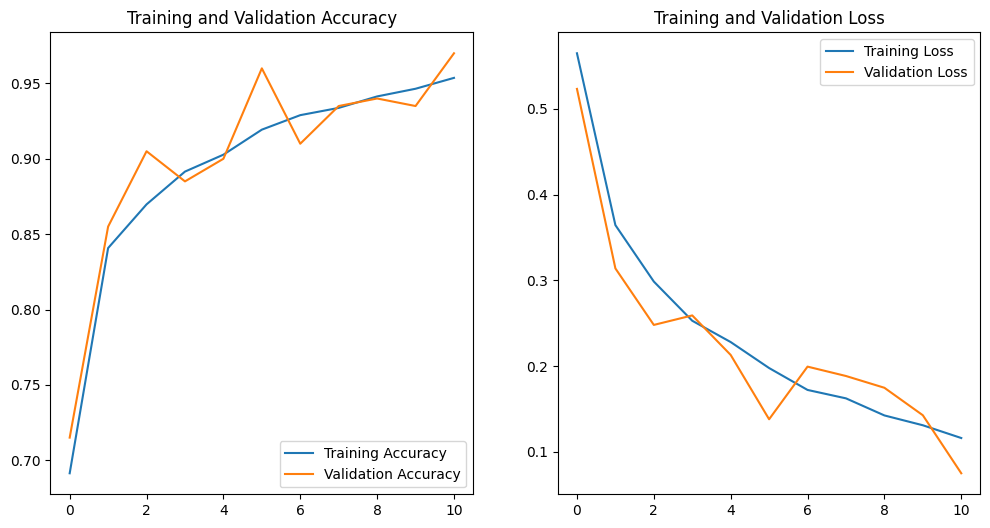

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(min(len(acc), len(val_acc)))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:len(epochs_range)], label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:len(epochs_range)], label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save Model to .h5

In [18]:
model.save('fresee.h5')
print("Model saved as 'fresee.h5'")

Model saved as 'fresee.h5'


# Test Model

Saving Fresh-apple.webp to Fresh-apple.webp
Saving fresh-banana.jpg to fresh-banana.jpg
Saving fresh-cucumber.png to fresh-cucumber.png
Saving fresh-okra.jpg to fresh-okra.jpg
Saving Fresh-oranges.jpg to Fresh-oranges.jpg
Saving Rotten-apple.jpg to Rotten-apple.jpg
Saving Rotten-Banana.jpg to Rotten-Banana.jpg
Saving Rotten-Cucumber.webp to Rotten-Cucumber.webp
Saving rotten-okra.jpg to rotten-okra.jpg
Saving rotten-oranges.jpg to rotten-oranges.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<ipython-input-26-2a92aaba35d6>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"


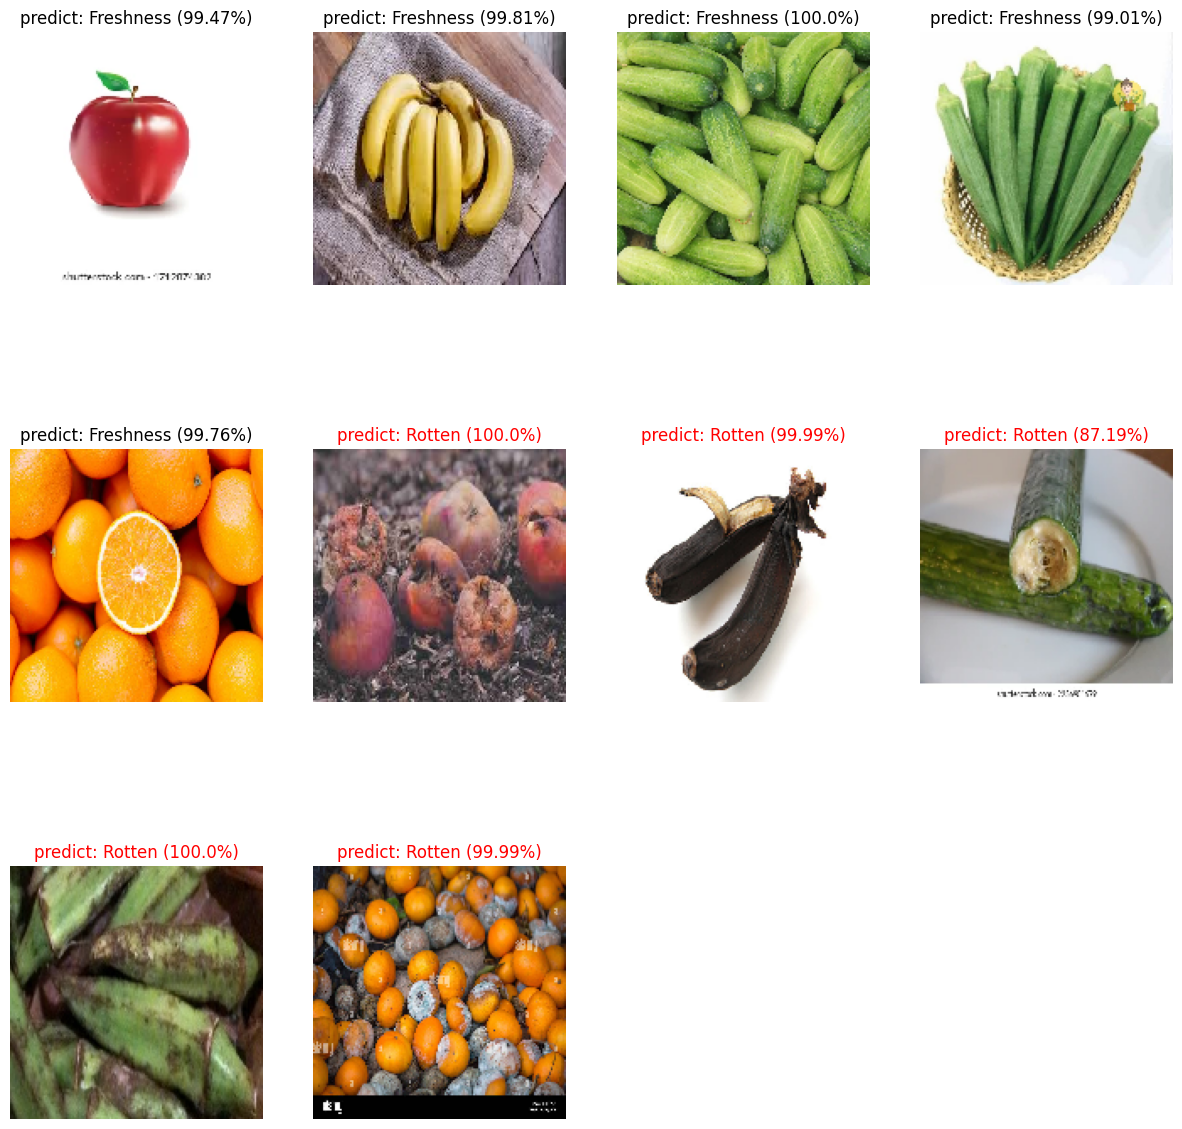

In [26]:
import cv2
import pathlib

from google.colab import files
from keras.utils import get_file
from keras.preprocessing import image

model_predict = tf.keras.models.load_model('fresee.h5')
model_predict.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode = "rgb", target_size = (150, 150), interpolation = "nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Freshness')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot(int(np.ceil(len(image_name)/4)), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Freshness':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')